## Klasifikacija težine djece s obzirom na značajke majke
##### Child Birth Weight Dataset
Zakir Hussain, and Malaya Dutta Borah<br>
Department of Computer Science and Engineering, National Institute of Technology Silchar,<br>
NIT Road, Cachar, Silchar, 788010, Assam, India

Kao prvi korak potrebno je učitati potrebne biblioteke.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

import xgboost as xgb

import warnings

In [2]:
!pip install imbalanced-learn==0.6.0

Učitavanje dataseta.

In [3]:
df = pd.read_csv('CBWDB.csv')

Dataset se sastoji od 1800 redaka i 19 stupaca.

In [4]:
df.shape

(1800, 19)

##### Što su značajke unutar skupa podataka?
###### Ulazne
KATEGORIČKE<br> 
SEC: Socio-ekonomsko stanje rodilje<br> 
Age(years): Dob majke u vrijeme promatrane trudnoće<br> 
Term/Preterm: Rođenje djeteta u očekivanom terminu (term) ili prije (preterm) 
    Termin: 37 do 40 tjedana, Preterm: <37 tjedana<br> 
Sex: Spol novorođenčeta<br> 

KONTINUIRANE:<br> 
Height(cm): Visina majke u vrijeme promatrane trudnoće<br> 
Bgroup: Krvna grupa majke<br> 
Parity: Broj trudnoća prije promatrane<br> 
ANC: Broj ginekoloških pregleda prije trudnoće<br> 
Iwt(kg): Inicijalna masa prije trudnoće<br> 
FWt(kg): Masa majke na zadnjem pregledu prije poroda<br> 
IBP_sys: Inicijalni sistolički krvni tlak majke<br> 
IBP_dias: Inicijalni distolički krvni tlak majke<br> 
FBP_sys: Sistolički krvni tlak majke na posljednjem pregledu prije poroda<br> 
FBP_dias: Distolički krvni tlak majke na posljednjem pregledu prije poroda<br> 
IHb(gm%): Inicijalna razina hemoglobina u krvi majke<br> 
FHb(gm%): Razina hemoglobina na zadnje pregledu prije poroda<br> 
BS(RBS): Razina šećera u krvi (random)<br> 
BWt(kg): Masa novorođenčeta

###### Što je izlaz?
Klase mase novorođenčeta: LNH<br> 
L = 1 : Ispodprosječne mase, <br> 
N = 2 : Prosječna masa, <br> 
H = 3 : Iznadprosječne mase

In [5]:
df.head()

,SEC,Age(years),Height(cm),Bgroup,Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),Term/Preterm,Sex,BWt(kg),LNH
0,BPL,23.0,146.0,A(+ve),1.0,4.0,34.0,42.0,116.0,78.0,120.0,70.0,10.0,13.2,90.0,T,F,2.7,2.0
1,BPL,25.0,165.0,NIL,1.0,3.0,68.0,71.0,96.0,70.0,110.0,72.0,10.4,11.0,96.0,T,M,2.9,2.0
2,BPL,24.0,155.0,B(+ve),1.0,3.0,49.0,55.0,91.0,52.0,110.0,70.0,11.0,11.6,102.0,T,M,2.4,1.0
3,BPL,19.0,154.0,NIL,1.0,2.0,49.0,50.0,90.0,52.0,100.0,60.0,10.0,10.6,103.0,T,F,2.6,2.0
4,BPL,21.0,150.0,NIL,1.0,4.0,41.0,48.0,100.0,60.0,110.0,70.0,9.0,10.2,99.0,T,F,2.3,1.0


Ispis deskriptivne statistike.

In [6]:
df.describe()

,Age(years),Height(cm),Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),BWt(kg),LNH
count,1786.000000,1527.000000,1767.000000,1781.000000,1751.000000,1739.000000,1760.000000,1760.000000,1749.000000,1748.000000,1395.000000,1393.000000,608.000000,1072.000000,1072.000000
mean,22.986002,143.785855,0.667233,3.423358,45.749857,51.645371,108.032386,66.091477,111.819325,69.405606,9.919398,10.401651,100.898026,2.759580,1.871269
std,4.050843,19.702879,0.993277,0.889005,6.655457,6.905943,12.021658,8.263232,11.809435,9.249682,1.052058,0.989487,17.251874,0.430413,0.346026
min,8.000000,10.000000,0.000000,1.000000,30.000000,30.000000,10.000000,14.000000,10.000000,10.000000,6.000000,1.500000,12.000000,0.500000,1.000000
25%,20.000000,135.000000,0.000000,3.000000,41.000000,47.000000,100.000000,60.000000,110.000000,60.000000,9.200000,10.000000,93.000000,2.500000,2.000000
50%,22.000000,150.000000,0.000000,4.000000,45.000000,51.000000,110.000000,66.000000,110.000000,70.000000,10.000000,10.400000,100.000000,2.700000,2.000000
75%,25.000000,150.000000,1.000000,4.000000,50.000000,55.000000,112.000000,70.000000,120.000000,78.000000,10.600000,11.000000,109.000000,3.000000,2.000000
max,55.000000,195.000000,6.000000,4.000000,93.000000,100.000000,196.000000,100.000000,160.000000,117.000000,13.000000,13.200000,240.000000,4.500000,3.000000


Suma jedinstvenih vrijednosti za sve značajke u datasetu.

In [7]:
df.nunique()

SEC              2
Age(years)      28
Height(cm)      59
Bgroup          13
Parity           7
ANC              4
Iwt(kg)         45
FWt(kg)         48
IBP_sys         59
IBP_dias        48
FBP_sys         55
FBP_dias        52
IHb(gm%)        55
FHb(gm%)        52
BS(RBS)         83
Term/Preterm     3
Sex              3
BWt(kg)         36
LNH              3
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEC           1150 non-null   object 
 1   Age(years)    1786 non-null   float64
 2   Height(cm)    1527 non-null   float64
 3   Bgroup        798 non-null    object 
 4   Parity        1767 non-null   float64
 5   ANC           1781 non-null   float64
 6   Iwt(kg)       1751 non-null   float64
 7   FWt(kg)       1739 non-null   float64
 8   IBP_sys       1760 non-null   float64
 9   IBP_dias      1760 non-null   float64
 10  FBP_sys       1749 non-null   float64
 11  FBP_dias      1748 non-null   float64
 12  IHb(gm%)      1395 non-null   float64
 13  FHb(gm%)      1393 non-null   float64
 14  BS(RBS)       608 non-null    float64
 15  Term/Preterm  962 non-null    object 
 16  Sex           1142 non-null   object 
 17  BWt(kg)       1072 non-null   float64
 18  LNH           1072 non-null 

Ispis NaN vrijednosti u datasetu.

In [9]:
df.isna().sum()

SEC              650
Age(years)        14
Height(cm)       273
Bgroup          1002
Parity            33
ANC               19
Iwt(kg)           49
FWt(kg)           61
IBP_sys           40
IBP_dias          40
FBP_sys           51
FBP_dias          52
IHb(gm%)         405
FHb(gm%)         407
BS(RBS)         1192
Term/Preterm     838
Sex              658
BWt(kg)          728
LNH              728
dtype: int64

Stupac klase koju je potrebno predvidjeti modelom ima 728 NaN vrijednosti koje je potrebno izbaciti iz skupa podataka. Također, nakon pregleda zapisa redaka koji predstavljaju stršeće vrijednosti, potrebno je te zapise izbaciti iz skupa. U skupu za te značajke (Height i Age) će ostati vrijesti veće od 120 cm i 10 godina respektivno.

In [10]:
df = df[df['LNH'].notna()]
df = df[df['LNH'] != 3]

df = df[df['Height(cm)'] > 120]
df = df[df['Age(years)'] > 10]

df = df.reset_index(drop=True)

Pogled na NaN vrijednosti nakon izbacivanja zapisa prema gore navedenim kriterijima:

In [11]:
df.isna().sum()

SEC             131
Age(years)        0
Height(cm)        0
Bgroup          178
Parity            0
ANC               0
Iwt(kg)           2
FWt(kg)           3
IBP_sys           1
IBP_dias          1
FBP_sys           3
FBP_dias          3
IHb(gm%)         79
FHb(gm%)         78
BS(RBS)         248
Term/Preterm     89
Sex               3
BWt(kg)           0
LNH               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEC           609 non-null    object 
 1   Age(years)    740 non-null    float64
 2   Height(cm)    740 non-null    float64
 3   Bgroup        562 non-null    object 
 4   Parity        740 non-null    float64
 5   ANC           740 non-null    float64
 6   Iwt(kg)       738 non-null    float64
 7   FWt(kg)       737 non-null    float64
 8   IBP_sys       739 non-null    float64
 9   IBP_dias      739 non-null    float64
 10  FBP_sys       737 non-null    float64
 11  FBP_dias      737 non-null    float64
 12  IHb(gm%)      661 non-null    float64
 13  FHb(gm%)      662 non-null    float64
 14  BS(RBS)       492 non-null    float64
 15  Term/Preterm  651 non-null    object 
 16  Sex           737 non-null    object 
 17  BWt(kg)       740 non-null    float64
 18  LNH           740 non-null    

Kontinuirane značajke čije su vrijednosti NaN još uvijek bit će imputane prosječnim vrijednostima dataseta za te značajke.

In [13]:
df_tmp = df.copy()

# ubaci srednju vrijednost godina tamo gdje nedostaje ta informacija
df_tmp.loc[df_tmp['Age(years)'].isna(), 'Age(years)'] = df_tmp.loc[:, 'Age(years)'].mean()

# ubaci srednju vrijednosti značajke visine 
df_tmp.loc[df_tmp['Height(cm)'].isna(), 'Height(cm)'] = df_tmp.loc[:, 'Height(cm)'].mean()

# Masa Iwt i FWt
df_tmp.loc[df_tmp['Iwt(kg)'].isna(), 'Iwt(kg)'] = df_tmp.loc[:, 'Iwt(kg)'].mean()
df_tmp.loc[df_tmp['FWt(kg)'].isna(), 'FWt(kg)'] = df_tmp.loc[:, 'FWt(kg)'].mean()

# Tlakova IBP i FBP
df_tmp.loc[df_tmp['IBP_sys'].isna(), 'IBP_sys'] = df_tmp.loc[:, 'IBP_sys'].mean()
df_tmp.loc[df_tmp['IBP_dias'].isna(), 'IBP_dias'] = df_tmp.loc[:, 'IBP_dias'].mean()
df_tmp.loc[df_tmp['FBP_sys'].isna(), 'FBP_sys'] = df_tmp.loc[:, 'FBP_sys'].mean()
df_tmp.loc[df_tmp['FBP_dias'].isna(), 'FBP_dias'] = df_tmp.loc[:, 'FBP_dias'].mean()

# Hemoglobina
df_tmp.loc[df_tmp['IHb(gm%)'].isna(), 'IHb(gm%)'] = df_tmp.loc[:, 'IHb(gm%)'].mean()
df_tmp.loc[df_tmp['FHb(gm%)'].isna(), 'FHb(gm%)'] = df_tmp.loc[:, 'FHb(gm%)'].mean()

# Šećera
df_tmp.loc[df_tmp['BS(RBS)'].isna(), 'BS(RBS)'] = df_tmp.loc[:, 'BS(RBS)'].mean()

df_tmp.drop(('SEC'), axis=1, inplace=True)
df_tmp.drop(('Term/Preterm'), axis=1, inplace=True)
df_tmp.drop(('ANC'), axis=1, inplace=True)
df_tmp.drop(('Parity'), axis=1, inplace=True)
df_tmp.drop(('Sex'), axis=1, inplace=True)
df_tmp.drop(('Bgroup'), axis=1, inplace=True)

Kategorijske značajke su izbačene da bismo trenirali samo kontinuirane značajke na modelu Gaussian Naive Bayes.

In [14]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age(years)  740 non-null    float64
 1   Height(cm)  740 non-null    float64
 2   Iwt(kg)     740 non-null    float64
 3   FWt(kg)     740 non-null    float64
 4   IBP_sys     740 non-null    float64
 5   IBP_dias    740 non-null    float64
 6   FBP_sys     740 non-null    float64
 7   FBP_dias    740 non-null    float64
 8   IHb(gm%)    740 non-null    float64
 9   FHb(gm%)    740 non-null    float64
 10  BS(RBS)     740 non-null    float64
 11  BWt(kg)     740 non-null    float64
 12  LNH         740 non-null    float64
dtypes: float64(13)
memory usage: 75.3 KB


Za potrebe su definirane funckije klasifikacija koje koriste Gaussian Naive Bayes, Categorical Naive Bayes i Multinomial Naive Bayes modele. Prije treniranja modela i predviđanja, u obje funkcije su splitani podaci na train i test u omjeru 70% i 30%, u jednakim omjerima kao što su zastupljeni u datasetu (stratify=y), s jednakim podacima (random_state=4). Također, za razliku od 2. faze projekta, izbačen je stupac mase djeteta prema kojem su kreirane klase L, N i H.

In [15]:
def classification(df):
    # odvajanje oznake klase
    X = df.loc[:,  (df.columns != 'LNH') & (df.columns != 'BWt(kg)')]
    y = df.loc[:, 'LNH']
    
    # razdvoji podatke
    # 70% training i 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y) 
    
    # instanca klase i treniranje modela
    nbc = GaussianNB()
    nbc.fit(X_train, y_train)
    y_pred = nbc.predict(X_test)
    
    # isprintaj matricu konfuzije
    print(confusion_matrix(y_test, y_pred))
    
    # isprintaj klasifikacijski report s metrikama točnosti, odziva, f1 
    label_names = ['L', 'N']
    print(classification_report(y_test, y_pred ,target_names=label_names))

In [16]:
def classification_cat_nb(df):
    # odvajanje oznake klase
    X = df.loc[:,  (df.columns != 'LNH') & (df.columns != 'BWt(kg)')]
    y = df.loc[:, 'LNH']
    
    # razdvoji podatke
    # 70% training i 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y) 
    
    # instanca klase i treniranje modela
    nb_cat = CategoricalNB()
    nb_cat.fit(X_train, y_train)
    y_pred = nb_cat.predict(X_test)
    
    # isprintaj matricu konfuzije
    print(confusion_matrix(y_test, y_pred))
    
    # isprintaj klasifikacijski report s metrikama točnosti, odziva, f1 
    label_names = ['L', 'N']
    print(classification_report(y_test, y_pred ,target_names=label_names))

In [17]:
def multinomial_nb(df):
    # odvajanje oznake klase
    X = df.loc[:,  (df.columns != 'LNH') & (df.columns != 'BWt(kg)')]
    y = df.loc[:, 'LNH']
    
    # razdvoji podatke
    # 70% training i 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y) 
    
    # instanca klase i treniranje modela
    mlt = MultinomialNB()
    mlt.fit(X_train, y_train)
    y_pred = mlt.predict(X_test)
    
    # isprintaj matricu konfuzije
    print(confusion_matrix(y_test, y_pred))
    
    # isprintaj klasifikacijski report s metrikama točnosti, odziva, f1 
    label_names = ['L', 'N']
    print(classification_report(y_test, y_pred ,target_names=label_names))

Na imputanim podacima dobiveni su sljedeći podaci:

In [18]:
classification(df_tmp)

[[  1  36]
 [  2 183]]
              precision    recall  f1-score   support

           L       0.33      0.03      0.05        37
           N       0.84      0.99      0.91       185

    accuracy                           0.83       222
   macro avg       0.58      0.51      0.48       222
weighted avg       0.75      0.83      0.76       222



Lošiji su od podataka iz druge faze projekta jer je izbačen navedeni stupac mase djeteta. Stoga ćemo se pozabaviti dodavanjem kategoričkih varijabli te dobiti predikcije za takve skupove podataka korišteći modele par čelija iznad.

Za početak ćemo srediti značajku spola djeteta. Te izračunati prosječnu masu djeteta prema spolu da vidimo razlikuje li se masa po toj varijabli.

In [19]:
df = df.loc[df.Sex != 'T', :]
df[['Sex', 'BWt(kg)']].groupby(['Sex'], as_index=False).mean()

,Sex,BWt(kg)
0,F,2.712325
1,M,2.728307


Ne razlikuje se previše, no svejedno ćemo isprobati kako modeli tretiraju istu. Isto ćemo napraviti i sa značajkom Term/Preterm.

In [20]:
df['Term/Preterm'] = df['Term/Preterm'].replace('t', 'T')
df[['Term/Preterm', 'BWt(kg)']].groupby(['Term/Preterm'], as_index=False).mean()

,Term/Preterm,BWt(kg)
0,PT,2.385484
1,T,2.760136


Očekivano, značajka koja govori je li dijete rođeno u terminu ili ranije, razlikuje prosječnu masu djeteta. 

Uz to, kako izgledaju prosječne mase djeteta grupirane prema značajkama SEC, Parity i ANC.

In [21]:
df[['SEC', 'BWt(kg)']].groupby(['SEC'], as_index=False).mean()

,SEC,BWt(kg)
0,APL,2.707372
1,BPL,2.742239


In [22]:
df[['ANC', 'BWt(kg)']].groupby(['ANC'], as_index=False).mean()

,ANC,BWt(kg)
0,1.0,2.550000
1,2.0,2.665714
2,3.0,2.653659
3,4.0,2.743085


In [23]:
df[['Parity', 'BWt(kg)']].groupby(['Parity'], as_index=False).mean()

,Parity,BWt(kg)
0,0.0,2.742197
1,1.0,2.717153
2,2.0,2.631944
3,3.0,2.635294
4,4.0,2.528571
5,6.0,3.100000


Grupirane značajke prema broju trudnoća prije promatrane (Parity) te prosječna dob majke dalju sljedeći podaci.

In [24]:
parity_age = df[['Parity', 'Age(years)']].groupby(['Parity'], as_index=False).mean()
parity_age

,Parity,Age(years)
0,0.0,21.505133
1,1.0,24.518248
2,2.0,26.305556
3,3.0,26.676471
4,4.0,27.857143
5,6.0,26.000000


Gore grupirane vrijednosti će u sljedećem koraku biti korištene za imputanje nedostajućih vrijednosti značajki Parity, inicijalne mase majke (IWt), finalne mase majke (FWt) i visine majke (Height).

In [25]:
# popuni nedostajuće vrijednosti stupca Age(years) na temelju vrijednosti stupca Parity
mask = (df['Parity'] == 0) & (df['Age(years)'].isna())
df.loc[mask, 'Age(years)'] = parity_age.loc[parity_age['Parity'] == 0, 'Age(years)'].values[0]
mask = (df['Parity'] == 1) & (df['Age(years)'].isna())
df.loc[mask, 'Age(years)'] = parity_age.loc[parity_age['Parity'] == 1, 'Age(years)'].values[0]
mask = (df['Parity'] == 2) & (df['Age(years)'].isna())
df.loc[mask, 'Age(years)'] = parity_age.loc[parity_age['Parity'] == 2, 'Age(years)'].values[0]
mask = (df['Parity'] == 3) & (df['Age(years)'].isna())
df.loc[mask, 'Age(years)'] = parity_age.loc[parity_age['Parity'] == 3, 'Age(years)'].values[0]
mask = (df['Parity'] == 4) & (df['Age(years)'].isna())
df.loc[mask, 'Age(years)'] = parity_age.loc[parity_age['Parity'] == 4, 'Age(years)'].values[0]
mask = (df['Parity'] == 5) & (df['Age(years)'].isna())
df.loc[mask, 'Age(years)'] = parity_age.loc[parity_age['Parity'] == 5, 'Age(years)'].values[0]
mask = (df['Parity'] == 6) & (df['Age(years)'].isna())
df.loc[mask, 'Age(years)'] = parity_age.loc[parity_age['Parity'] == 6, 'Age(years)'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [26]:
parity_iwt = df[['Parity', 'Iwt(kg)']].groupby(['Parity'], as_index=False).mean()
parity_iwt

,Parity,Iwt(kg)
0,0.0,45.422680
1,1.0,46.912409
2,2.0,47.805556
3,3.0,44.205882
4,4.0,43.285714
5,6.0,60.000000


In [27]:
# popuni nedostajuće vrijednosti stupca Iwt(kg) na temelju vrijednosti stupca Parity
mask = (df['Parity'] == 0) & (df['Iwt(kg)'].isna())
df.loc[mask, 'Iwt(kg)'] = parity_iwt.loc[parity_iwt['Parity'] == 0, 'Iwt(kg)'].values[0]
mask = (df['Parity'] == 1) & (df['Iwt(kg)'].isna())
df.loc[mask, 'Iwt(kg)'] = parity_iwt.loc[parity_iwt['Parity'] == 1, 'Iwt(kg)'].values[0]
mask = (df['Parity'] == 2) & (df['Iwt(kg)'].isna())
df.loc[mask, 'Iwt(kg)'] = parity_iwt.loc[parity_iwt['Parity'] == 2, 'Iwt(kg)'].values[0]
mask = (df['Parity'] == 3) & (df['Iwt(kg)'].isna())
df.loc[mask, 'Iwt(kg)'] = parity_iwt.loc[parity_iwt['Parity'] == 3, 'Iwt(kg)'].values[0]
mask = (df['Parity'] == 4) & (df['Iwt(kg)'].isna())
df.loc[mask, 'Iwt(kg)'] = parity_iwt.loc[parity_iwt['Parity'] == 4, 'Iwt(kg)'].values[0]
mask = (df['Parity'] == 5) & (df['Iwt(kg)'].isna())
df.loc[mask, 'Iwt(kg)'] = parity_iwt.loc[parity_iwt['Parity'] == 5, 'Iwt(kg)'].values[0]
mask = (df['Parity'] == 6) & (df['Iwt(kg)'].isna())
df.loc[mask, 'Iwt(kg)'] = parity_iwt.loc[parity_iwt['Parity'] == 6, 'Iwt(kg)'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [28]:
parity_fwt = df[['Parity', 'FWt(kg)']].groupby(['Parity'], as_index=False).mean()
parity_fwt

,Parity,FWt(kg)
0,0.0,51.953099
1,1.0,53.605839
2,2.0,53.416667
3,3.0,51.705882
4,4.0,51.000000
5,6.0,66.000000


In [29]:
# popuni nedostajuće vrijednosti stupca 'FWt(kg)' na temelju prosječne vrijednosti stupca Parity
mask = (df['Parity'] == 0) & (df['FWt(kg)'].isna())
df.loc[mask, 'FWt(kg)'] = parity_fwt.loc[parity_fwt['Parity'] == 0, 'FWt(kg)'].values[0]
mask = (df['Parity'] == 1) & (df['FWt(kg)'].isna())
df.loc[mask, 'FWt(kg)'] = parity_fwt.loc[parity_fwt['Parity'] == 1, 'FWt(kg)'].values[0]
mask = (df['Parity'] == 2) & (df['FWt(kg)'].isna())
df.loc[mask, 'FWt(kg)'] = parity_fwt.loc[parity_fwt['Parity'] == 2, 'FWt(kg)'].values[0]
mask = (df['Parity'] == 3) & (df['FWt(kg)'].isna())
df.loc[mask, 'FWt(kg)'] = parity_fwt.loc[parity_fwt['Parity'] == 3, 'FWt(kg)'].values[0]
mask = (df['Parity'] == 4) & (df['FWt(kg)'].isna())
df.loc[mask, 'FWt(kg)'] = parity_fwt.loc[parity_fwt['Parity'] == 4, 'FWt(kg)'].values[0]
mask = (df['Parity'] == 5) & (df['FWt(kg)'].isna())
df.loc[mask, 'FWt(kg)'] = parity_fwt.loc[parity_fwt['Parity'] == 5, 'FWt(kg)'].values[0]
mask = (df['Parity'] == 6) & (df['FWt(kg)'].isna())
df.loc[mask, 'FWt(kg)'] = parity_fwt.loc[parity_fwt['Parity'] == 6, 'FWt(kg)'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [30]:
height_lnh = df[['Height(cm)', 'LNH']].groupby(['LNH'], as_index=False).mean()
height_lnh

,LNH,Height(cm)
0,1.0,151.647541
1,2.0,149.152597


In [31]:
# popuni nedostajuće vrijednosti stupca Height(cm) temeljem prosječne vrijednosti za klase LNH
mask = (df['LNH'] == 1) & (df['Height(cm)'].isna())
df.loc[mask, 'Height(cm)'] = height_lnh.loc[height_lnh['LNH'] == 1, 'Height(cm)'].values[0]
mask = (df['LNH'] == 2) & (df['Height(cm)'].isna())
df.loc[mask, 'Height(cm)'] = height_lnh.loc[height_lnh['LNH'] == 2, 'Height(cm)'].values[0]

In [32]:
age_lnh = df[['Age(years)', 'LNH']].groupby(['LNH'], as_index=False).mean()
age_lnh

,LNH,Age(years)
0,1.0,22.409836
1,2.0,22.922078


Nedostajuće vrijednosti za krvne tlakove, udio hemoglobina u krvi te krvnog tlaka bit će imputane prosječnim vrijednostima tih značajki.

In [33]:
df.loc[df['IBP_sys'].isna(),'IBP_sys'] = df.loc[:,'IBP_sys'].mean()
df.loc[df['IBP_dias'].isna(),'IBP_dias'] = df.loc[:,'IBP_dias'].mean()
df.loc[df['FBP_sys'].isna(),'FBP_sys'] = df.loc[:,'FBP_sys'].mean()
df.loc[df['FBP_dias'].isna(),'FBP_dias'] = df.loc[:,'FBP_dias'].mean()
df.loc[df['IHb(gm%)'].isna(),'IHb(gm%)'] = df.loc[:,'IHb(gm%)'].mean()
df.loc[df['FHb(gm%)'].isna(),'FHb(gm%)'] = df.loc[:,'FHb(gm%)'].mean()
df.loc[df['FBP_sys'].isna(),'FBP_sys'] = df.loc[:,'FBP_sys'].mean()
df.loc[df['BS(RBS)'].isna(),'BS(RBS)'] = df.loc[:,'BS(RBS)'].mean()

In [34]:
df = df.reset_index(drop=True)

Nedostajuće vrijednosti značajke Term/Preterm će biti izbačene iz skupa podataka.

In [35]:
df = df[df['Term/Preterm'].notna()]

In [36]:
df = df.reset_index(drop=True)

Provjera nedostajućih vrijednosti.

In [37]:
df.isna().sum()

SEC             43
Age(years)       0
Height(cm)       0
Bgroup          88
Parity           0
ANC              0
Iwt(kg)          0
FWt(kg)          0
IBP_sys          0
IBP_dias         0
FBP_sys          0
FBP_dias         0
IHb(gm%)         0
FHb(gm%)         0
BS(RBS)          0
Term/Preterm     0
Sex              3
BWt(kg)          0
LNH              0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEC           606 non-null    object 
 1   Age(years)    649 non-null    float64
 2   Height(cm)    649 non-null    float64
 3   Bgroup        561 non-null    object 
 4   Parity        649 non-null    float64
 5   ANC           649 non-null    float64
 6   Iwt(kg)       649 non-null    float64
 7   FWt(kg)       649 non-null    float64
 8   IBP_sys       649 non-null    float64
 9   IBP_dias      649 non-null    float64
 10  FBP_sys       649 non-null    float64
 11  FBP_dias      649 non-null    float64
 12  IHb(gm%)      649 non-null    float64
 13  FHb(gm%)      649 non-null    float64
 14  BS(RBS)       649 non-null    float64
 15  Term/Preterm  649 non-null    object 
 16  Sex           646 non-null    object 
 17  BWt(kg)       649 non-null    float64
 18  LNH           649 non-null    

Ostaju još značajke SEC i Krvna grupa sa čime ćemo se pozabaviti nešto kasnije.

Nadalje, inicijaliziramo enkoder za kodiranje podataka tipa string u integer s Label Encoderom. Prvo, za značajku Term/Preterm.

In [39]:
# inicijalizacija enkodera
le = LabelEncoder()

# Term/Preterm
le.fit(df.loc[:, 'Term/Preterm'])
df.loc[:, 'Term/Preterm'] = le.transform(df.loc[:, 'Term/Preterm'])

C:\Users\AntonioB25\AppData\Local\Temp\ipykernel_8508\1458233906.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Term/Preterm'] = le.transform(df.loc[:, 'Term/Preterm'])


In [40]:
df.head()

,SEC,Age(years),Height(cm),Bgroup,Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),Term/Preterm,Sex,BWt(kg),LNH
0,BPL,23.0,146.0,A(+ve),1.0,4.0,34.0,42.0,116.0,78.0,120.0,70.0,10.0,13.2,90.0,1,F,2.7,2.0
1,BPL,25.0,165.0,NIL,1.0,3.0,68.0,71.0,96.0,70.0,110.0,72.0,10.4,11.0,96.0,1,M,2.9,2.0
2,BPL,24.0,155.0,B(+ve),1.0,3.0,49.0,55.0,91.0,52.0,110.0,70.0,11.0,11.6,102.0,1,M,2.4,1.0
3,BPL,19.0,154.0,NIL,1.0,2.0,49.0,50.0,90.0,52.0,100.0,60.0,10.0,10.6,103.0,1,F,2.6,2.0
4,BPL,21.0,150.0,NIL,1.0,4.0,41.0,48.0,100.0,60.0,110.0,70.0,9.0,10.2,99.0,1,F,2.3,1.0


Klasifikacija na svim značajka osim spola, socio ekonomskog statusa i krvne grupe. Rezultati su nešto bolji od klasificiranja na samo kontinuiranim podacima.

In [41]:
df_tmp = df.loc[:, ~df.columns.isin(['SEC', 'Sex', 'Bgroup'])].copy()
classification(df_tmp)

[[ 11  20]
 [ 25 139]]
              precision    recall  f1-score   support

           L       0.31      0.35      0.33        31
           N       0.87      0.85      0.86       164

    accuracy                           0.77       195
   macro avg       0.59      0.60      0.59       195
weighted avg       0.78      0.77      0.78       195



Kodiranje i značajke spola; umjesto F i M podataka bit će zamijenjeni 0 i 1.

In [42]:
df['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [43]:
df = df[df['Sex'].notna()]
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [44]:
df = df.reset_index(drop=True)
df.index

RangeIndex(start=0, stop=646, step=1)

In [45]:
le.fit(df.loc[:, 'Sex'])
df.loc[:, 'Sex'] = le.transform(df.loc[:, 'Sex'])

C:\Users\AntonioB25\AppData\Local\Temp\ipykernel_8508\2634546750.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Sex'] = le.transform(df.loc[:, 'Sex'])


Klasifikacija koristeći sve značajke osim SEC i Bgroup. Rezultati nepromijenjeni.

In [46]:
df_tmp = df.loc[:, ~df.columns.isin(['SEC', 'Bgroup'])].copy()
classification(df_tmp)

[[ 11  20]
 [ 24 139]]
              precision    recall  f1-score   support

           L       0.31      0.35      0.33        31
           N       0.87      0.85      0.86       163

    accuracy                           0.77       194
   macro avg       0.59      0.60      0.60       194
weighted avg       0.78      0.77      0.78       194



U sljedećem ćemo koraku vidjeti kakvi su rezultati ako u Gaussian Naive Bayes model ubacimo samo kategoričke varijable. 

In [47]:
df_tmp = df.loc[:, df.columns.isin(['Term/Preterm', 'Parity', 'ANC', 'LNH'])].copy()
classification(df_tmp)

[[ 12  19]
 [ 18 145]]
              precision    recall  f1-score   support

           L       0.40      0.39      0.39        31
           N       0.88      0.89      0.89       163

    accuracy                           0.81       194
   macro avg       0.64      0.64      0.64       194
weighted avg       0.81      0.81      0.81       194



Nešto su bolji, no ajmo isprobati i _Categorical Naive Bayes_ model koji je kreiran samo za kategoričke varijable.

In [48]:
classification_cat_nb(df_tmp)

[[  9  22]
 [ 13 150]]
              precision    recall  f1-score   support

           L       0.41      0.29      0.34        31
           N       0.87      0.92      0.90       163

    accuracy                           0.82       194
   macro avg       0.64      0.61      0.62       194
weighted avg       0.80      0.82      0.81       194



Takav model dalje nešto bolje rezultate za točnost i preciznost, no lošije za odziv i f1 score.

Sljedeći je korak provjera korelirajućih značajki koje bi trebalo izbaciti za modele Naive Bayes.

#### Provjera korelirajućih značajki

Imamo nekoliko parova koji su jako korelirajući <br>
Uglavnom su to vrijednosti za parametre na početku i na kraju trudnoće <br> <br>
To su stupci: <br>
`IHb(gm%)`  i  `FHb(gm%)`  - razina hemoglobina<br>
`IWt(kg)`  i  `FWt(kg)`  - težina<br>
`IBP_dias`  i  `FBP_dias` - dijastolički tlak<br>
`IBP_sys`  i  `IBP_sys` - sistolički tlak<br>


C:\Users\AntonioB25\AppData\Local\Temp\ipykernel_8508\2683113364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


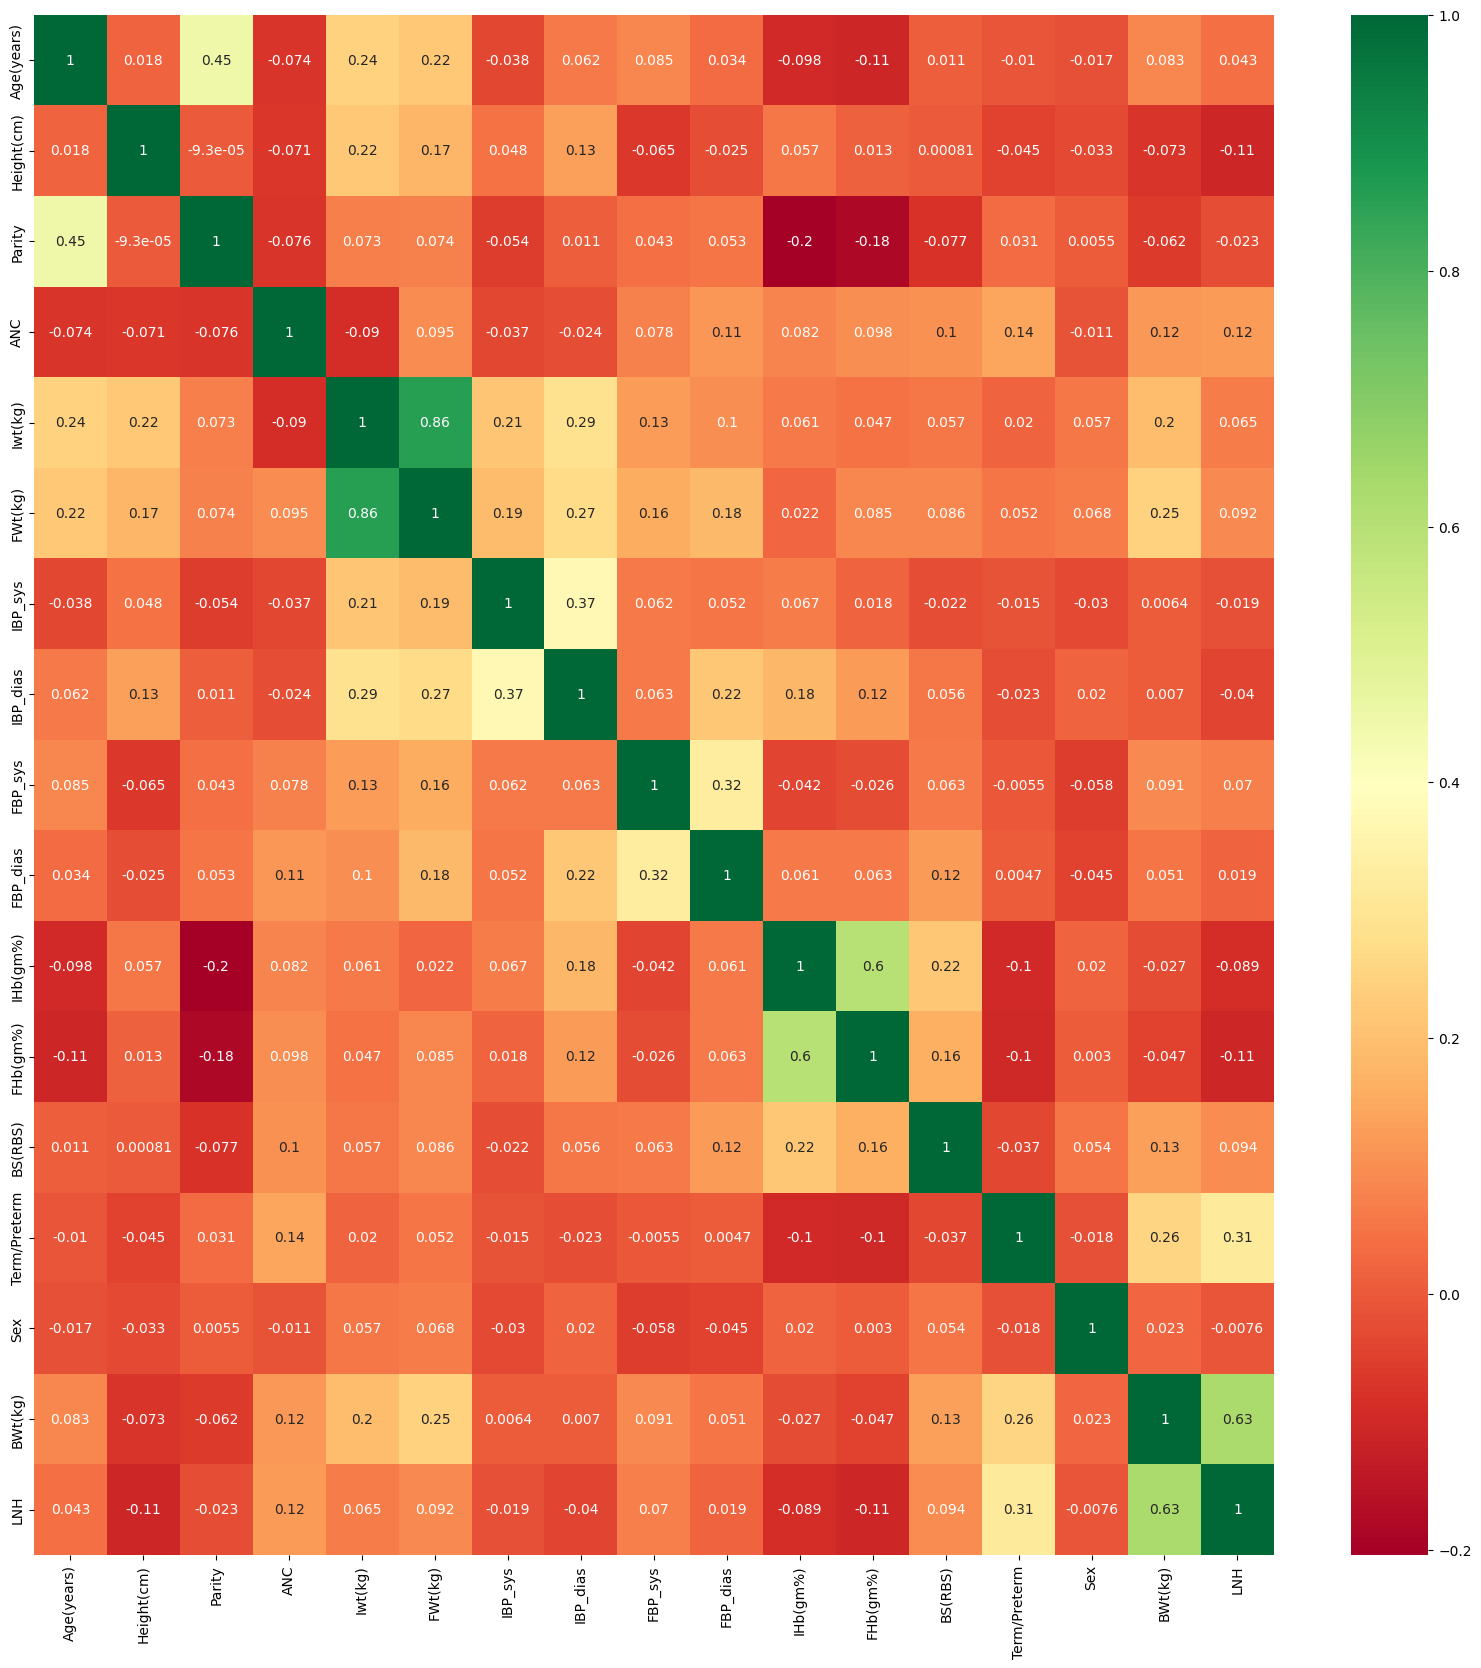

In [49]:
correlations = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot=True, cmap="RdYlGn")
plt.show()

Sukladno tome, izbacit ćemo značajke Iwt(kg), IBP_sys, IBP_dias, IHb(gm%). Dakle, inicijalne metrike (masa, krvni tlak, udio hemoglobina) za majku.

In [50]:
df_tmp = df.loc[:, ~df.columns.isin(['SEC', 'Bgroup', 'Term/Preterm', 'Iwt(kg)', 'IBP_sys', 'IBP_dias', 'IHb(gm%)'])].copy()
classification(df_tmp)

[[  4  27]
 [ 13 150]]
              precision    recall  f1-score   support

           L       0.24      0.13      0.17        31
           N       0.85      0.92      0.88       163

    accuracy                           0.79       194
   macro avg       0.54      0.52      0.52       194
weighted avg       0.75      0.79      0.77       194



Rezultati su lošiji. Što ako izbacimo iste metrike , ali mjerene na kraju trudnoće ?

In [51]:
df_tmp = df.loc[:, ~df.columns.isin(['SEC', 'Sex', 'Bgroup', 'Parity', 'ANC', 'Term/Preterm', 'FWt(kg)', 'FBP_sys', 'FBP_dias', 'FHb(gm%)'])].copy()
classification(df_tmp)

[[  0  31]
 [  1 162]]
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        31
           N       0.84      0.99      0.91       163

    accuracy                           0.84       194
   macro avg       0.42      0.50      0.46       194
weighted avg       0.71      0.84      0.76       194



Rezultati su ok za klasu N, no želimo uhvatiti i drugu klasu.

Klasifikacija na istim značajkama, ali bez značajke krvnog tlaka s obzirom da ona nije normalno distribuirana.

In [52]:
df_tmp = df.loc[:, ~df.columns.isin(['SEC', 'Sex', 'Bgroup','Parity', 'ANC', 'Term/Preterm', 'Iwt(kg)', 'IBP_sys', 'IBP_dias', 'IHb(gm%)', 'BS(RBS)'])].copy()
classification(df_tmp)

[[  0  31]
 [  1 162]]
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        31
           N       0.84      0.99      0.91       163

    accuracy                           0.84       194
   macro avg       0.42      0.50      0.46       194
weighted avg       0.71      0.84      0.76       194



In [53]:
df_tmp = df.loc[:, ~df.columns.isin(['SEC', 'Sex', 'Bgroup', 'Parity', 'ANC', 'Term/Preterm', 'FWt(kg)', 'FBP_sys', 'FBP_dias', 'FHb(gm%)', 'BS(RBS)'])].copy()
classification(df_tmp)

[[  0  31]
 [  2 161]]
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        31
           N       0.84      0.99      0.91       163

    accuracy                           0.83       194
   macro avg       0.42      0.49      0.45       194
weighted avg       0.70      0.83      0.76       194



Rezultati se nisu promijenili.

Nadalje ćemo kreirati nove stupce koji će za korelirane značajke uzimati prosjek metrike na početku i kraju trudnoće. Stoga su kreirane značajke prosječna masa majke, prosječni sistolički i dijastolički tlak, kao i prosjek udjela hemoglobina.

In [54]:
df['Wt(avg)'] = df[['Iwt(kg)', 'FWt(kg)']].mean(axis=1)
df['sys(avg)'] = df[['IBP_sys', 'FBP_sys']].mean(axis=1)
df['dias(avg)'] = df[['IBP_dias', 'FBP_dias']].mean(axis=1)
df['Hb(avg)'] = df[['IHb(gm%)', 'FHb(gm%)']].mean(axis=1)

Klasifikacija na takvim značajkama ne daje bolje rezultate.

In [55]:
features = ['SEC', 'Sex', 'Bgroup','Parity', 'ANC', 'Term/Preterm', 'FWt(kg)', 'FBP_sys', 'FBP_dias', 'FHb(gm%)', 'BS(RBS)', 'Iwt(kg)', 'IBP_sys', 'IBP_dias', 'IHb(gm%)', 'BS(RBS)']
df_tmp = df.loc[:, ~df.columns.isin(features)].copy()
classification(df_tmp)

[[  0  31]
 [  2 161]]
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        31
           N       0.84      0.99      0.91       163

    accuracy                           0.83       194
   macro avg       0.42      0.49      0.45       194
weighted avg       0.70      0.83      0.76       194



#### Dodavanje stupca BMI

Kao poboljšanje smo odlučili dodati novi stupac koji će predstavljati _Body Mass Index (BMI)_ <br>
Računamo ga na sljedeći način: <br>
### $$BMI = {{{IWt(kg) + FWt(kg)}\over {2}}\over {Height(m)}^2}$$

In [56]:
df = df.assign(BMI=lambda x: (x['Iwt(kg)'] + x['FWt(kg)']) / 2 / ((x['Height(cm)'] / 100) ** 2))
df.head()

,SEC,Age(years),Height(cm),Bgroup,Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,...,BS(RBS),Term/Preterm,Sex,BWt(kg),LNH,Wt(avg),sys(avg),dias(avg),Hb(avg),BMI
0,BPL,23.0,146.0,A(+ve),1.0,4.0,34.0,42.0,116.0,78.0,...,90.0,1,0,2.7,2.0,38.0,118.0,74.0,11.6,17.826984
1,BPL,25.0,165.0,NIL,1.0,3.0,68.0,71.0,96.0,70.0,...,96.0,1,1,2.9,2.0,69.5,103.0,71.0,10.7,25.528007
2,BPL,24.0,155.0,B(+ve),1.0,3.0,49.0,55.0,91.0,52.0,...,102.0,1,1,2.4,1.0,52.0,100.5,61.0,11.3,21.644121
3,BPL,19.0,154.0,NIL,1.0,2.0,49.0,50.0,90.0,52.0,...,103.0,1,0,2.6,2.0,49.5,95.0,56.0,10.3,20.871985
4,BPL,21.0,150.0,NIL,1.0,4.0,41.0,48.0,100.0,60.0,...,99.0,1,0,2.3,1.0,44.5,105.0,65.0,9.6,19.777778


Ostavljamo samo finalne vrijednosti za: tlak, težinu i hemoglobin<br>
Dobivamo malo lošije rezultate

In [57]:
df_tmp = df.loc[:, ~df.columns.isin(["IHb(gm%)", "Iwt(kg)", "IBP_dias", "IBP_sys", 'SEC', 'Wt(avg)',
       'sys(avg)', 'dias(avg)', 'Hb(avg)', 'Bgroup'])].copy()
classification(df_tmp)

[[ 11  20]
 [ 24 139]]
              precision    recall  f1-score   support

           L       0.31      0.35      0.33        31
           N       0.87      0.85      0.86       163

    accuracy                           0.77       194
   macro avg       0.59      0.60      0.60       194
weighted avg       0.78      0.77      0.78       194



Potrebno je provjeriti korelacije s obzirom na nove značajke.

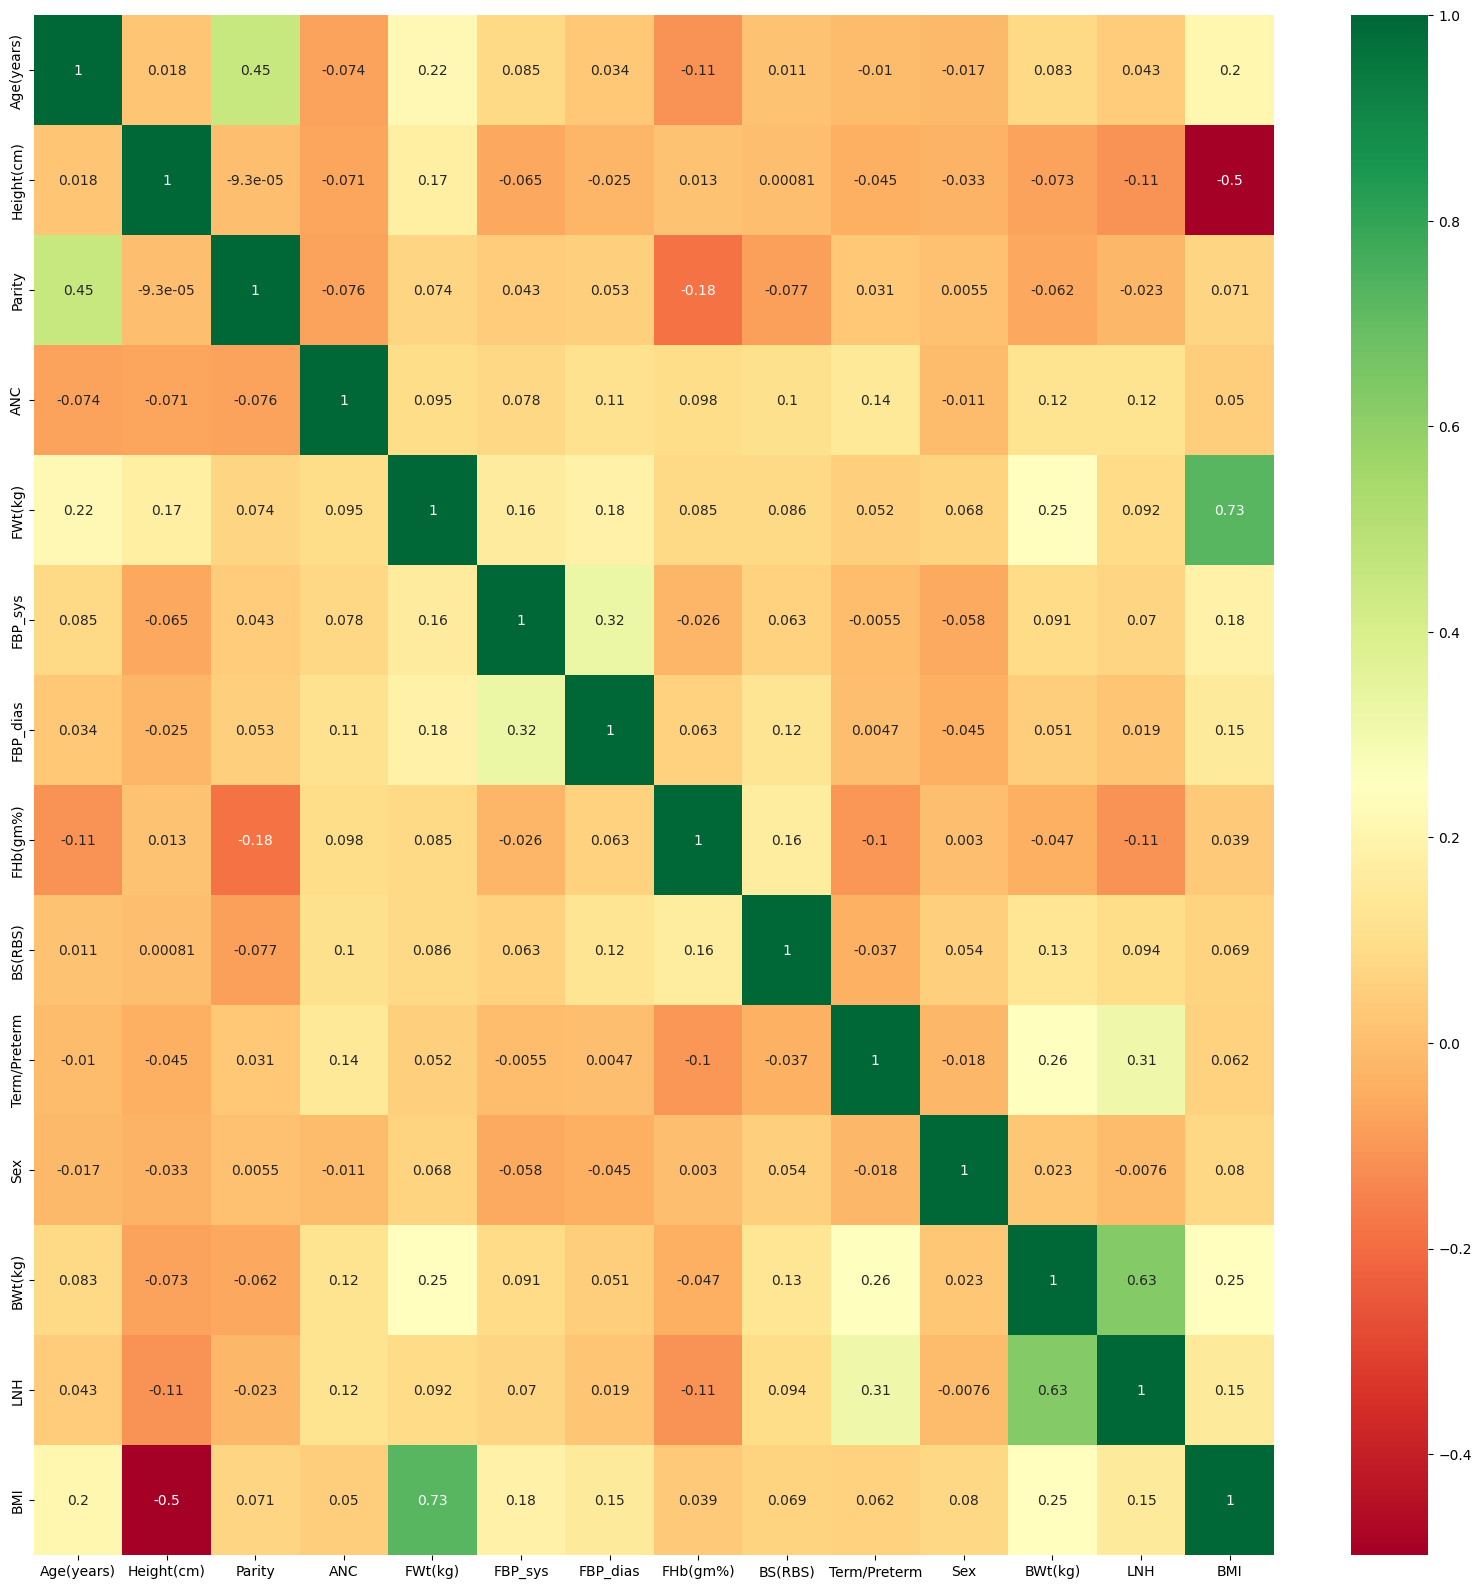

In [58]:
correlations = df_tmp.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot=True, cmap="RdYlGn")
plt.show()

Izbacujemo značajke FWt(kg) i Height(cm) te klasificiramo s originalnim podacima kontinuiranih značajki za slučaj matrike majke na kraju trudnoće (dakle, ne uzimamo prosječne vrijednosti).
Dobivamo nešto bolje rezultate.

In [59]:
df_tmp = df.loc[:, ~df.columns.isin(["IHb(gm%)", "Iwt(kg)", "IBP_dias", "IBP_sys", 'SEC', 'Wt(avg)',
       'sys(avg)', 'dias(avg)', 'Hb(avg)', 'Bgroup', 'FWt(kg)', 'Height(cm)'])].copy()
classification(df_tmp)

[[ 12  19]
 [ 22 141]]
              precision    recall  f1-score   support

           L       0.35      0.39      0.37        31
           N       0.88      0.87      0.87       163

    accuracy                           0.79       194
   macro avg       0.62      0.63      0.62       194
weighted avg       0.80      0.79      0.79       194



Klasifikacija s prosječnim vrijednostima.

In [60]:
df_tmp = df.loc[:, df.columns.isin(["Age(years)", "Parity", "ANC", "Term/Preterm", 'Sex', 'BWt(kg)', 'LNH', 'Wt(avg)', 'sys(avg)', 'dias(avg)', 'Hb(avg)','BMI'])].copy()
classification(df_tmp)

[[ 11  20]
 [ 26 137]]
              precision    recall  f1-score   support

           L       0.30      0.35      0.32        31
           N       0.87      0.84      0.86       163

    accuracy                           0.76       194
   macro avg       0.58      0.60      0.59       194
weighted avg       0.78      0.76      0.77       194



Nadalje, s obzirom da literatura predlaže diskretizaciju i kodiranje kontinuiranih varijabli, u sljedećim koracima ćemo upravo to i napraviti. Svaka kontinuirana varijabla će biti podijeljena u 5 intervala kojima će biti dodijeljeni kodovi (integeri od 1 do 5), u dataframe-u će biti kreirana nova značajka koju ćemo dodavati u klasifikacijske modele.

Značajka Age(years) podijeljena je u 5 intervala te je u odnosu na te intervale prikazan prosjek mase bebe.

In [61]:
df_tmp = df.loc[:, ~df.columns.isin(['SEC', 'Iwt(kg)', 'IBP_sys', 'IBP_dias', 'IHb(gm%)', 'BS(RBS)', 'Wt(avg)',
       'sys(avg)', 'dias(avg)', 'Hb(avg)'])].copy()

df_tmp['AgeBand'] = pd.cut(df['Age(years)'], 5)
df_tmp[['AgeBand', 'BWt(kg)']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,BWt(kg)
0,"(12.975, 18.0]",2.664286
1,"(18.0, 23.0]",2.708940
2,"(23.0, 28.0]",2.757303
3,"(28.0, 33.0]",2.797778
4,"(33.0, 38.0]",2.791304


Kodiranje.

In [62]:
le.fit(df_tmp.loc[:,'AgeBand'])

# transformiraj 
df_tmp.loc[:,'AgeBand'] = le.transform(df_tmp.loc[:,'AgeBand'])

C:\Users\AntonioB25\AppData\Local\Temp\ipykernel_8508\3967872405.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_tmp.loc[:,'AgeBand'] = le.transform(df_tmp.loc[:,'AgeBand'])


Pogledajmo kako to izgleda u dataframe-u. Dakle, kreirana je nova značajka/stupac AgeBand.

In [63]:
df_tmp

,Age(years),Height(cm),Bgroup,Parity,ANC,FWt(kg),FBP_sys,FBP_dias,FHb(gm%),Term/Preterm,Sex,BWt(kg),LNH,BMI,AgeBand
0,23.0,146.0,A(+ve),1.0,4.0,42.0,120.0,70.0,13.200000,1,0,2.7,2.0,17.826984,1
1,25.0,165.0,NIL,1.0,3.0,71.0,110.0,72.0,11.000000,1,1,2.9,2.0,25.528007,2
2,24.0,155.0,B(+ve),1.0,3.0,55.0,110.0,70.0,11.600000,1,1,2.4,1.0,21.644121,2
3,19.0,154.0,NIL,1.0,2.0,50.0,100.0,60.0,10.600000,1,0,2.6,2.0,20.871985,1
4,21.0,150.0,NIL,1.0,4.0,48.0,110.0,70.0,10.200000,1,0,2.3,1.0,19.777778,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,28.0,130.0,AB(+ve),3.0,4.0,51.0,110.0,76.0,10.000000,1,0,2.7,2.0,28.402367,2
642,23.0,130.0,A(+ve),1.0,4.0,49.0,120.0,80.0,10.731061,1,1,3.0,2.0,26.627219,1
643,28.0,135.0,B(+ve),1.0,4.0,49.0,120.0,80.0,11.500000,1,1,3.0,2.0,23.319616,2
644,18.0,150.0,B(+ve),0.0,4.0,48.0,110.0,80.0,10.731061,1,1,3.0,2.0,19.555556,0


Značajka Age postala je kategorička, te je zajedno s ostalim kategorijskim značajkama izvršena klasifikacija (trening i test).

Gaussian Naive Bayes:

In [64]:
features = ['Parity', 'ANC', 'Term/Preterm', 'Sex', 'LNH', 'AgeBand']
df_tmp_1 = df_tmp.loc[:, df_tmp.columns.isin(features)]
classification(df_tmp_1)

[[ 11  20]
 [ 20 143]]
              precision    recall  f1-score   support

           L       0.35      0.35      0.35        31
           N       0.88      0.88      0.88       163

    accuracy                           0.79       194
   macro avg       0.62      0.62      0.62       194
weighted avg       0.79      0.79      0.79       194



Categorical Naive Bayes:

In [65]:
classification_cat_nb(df_tmp_1)

[[  9  22]
 [ 10 153]]
              precision    recall  f1-score   support

           L       0.47      0.29      0.36        31
           N       0.87      0.94      0.91       163

    accuracy                           0.84       194
   macro avg       0.67      0.61      0.63       194
weighted avg       0.81      0.84      0.82       194



Multinomial Naive Bayes:

In [66]:
multinomial_nb(df_tmp_1)

[[  0  31]
 [  0 163]]
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        31
           N       0.84      1.00      0.91       163

    accuracy                           0.84       194
   macro avg       0.42      0.50      0.46       194
weighted avg       0.71      0.84      0.77       194



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nadalje je diskretizirana novokreirana značajka BMI:

In [67]:
df_tmp['BMIBand'] = pd.cut(df['BMI'], 5)
df_tmp[['BMIBand', 'BMI']].groupby(['BMIBand'], as_index=False).mean().sort_values(by='BMIBand', ascending=True)

,BMIBand,BMI
0,"(13.096, 17.455]",16.155218
1,"(17.455, 21.793]",20.181060
2,"(21.793, 26.131]",23.528906
3,"(26.131, 30.469]",27.918365
4,"(30.469, 34.807]",32.477021


In [68]:
le.fit(df_tmp.loc[:,'BMIBand'])

# transformiraj 
df_tmp.loc[:,'BMIBand'] = le.transform(df_tmp.loc[:,'BMIBand'])

C:\Users\AntonioB25\AppData\Local\Temp\ipykernel_8508\3536689546.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_tmp.loc[:,'BMIBand'] = le.transform(df_tmp.loc[:,'BMIBand'])


Klasifikacija (trening i test) s obzirom na novu kategorijsku značajku BMIBand. Zna gaussov model dobiveni su nešto bolji rezultati.

In [69]:
features = ['Parity', 'ANC', 'Term/Preterm', 'Sex', 'LNH', 'AgeBand', 'BMIBand']
df_tmp_1 = df_tmp.loc[:, df_tmp.columns.isin(features)]
classification(df_tmp_1)

[[ 12  19]
 [ 23 140]]
              precision    recall  f1-score   support

           L       0.34      0.39      0.36        31
           N       0.88      0.86      0.87       163

    accuracy                           0.78       194
   macro avg       0.61      0.62      0.62       194
weighted avg       0.79      0.78      0.79       194



In [70]:
classification_cat_nb(df_tmp_1)

[[  7  24]
 [  8 155]]
              precision    recall  f1-score   support

           L       0.47      0.23      0.30        31
           N       0.87      0.95      0.91       163

    accuracy                           0.84       194
   macro avg       0.67      0.59      0.61       194
weighted avg       0.80      0.84      0.81       194



In [71]:
multinomial_nb(df_tmp_1)

[[  0  31]
 [  0 163]]
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        31
           N       0.84      1.00      0.91       163

    accuracy                           0.84       194
   macro avg       0.42      0.50      0.46       194
weighted avg       0.71      0.84      0.77       194



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nadalje diskretiziramo značajku Height.

In [72]:
df_tmp['HeightBand'] = pd.cut(df_tmp['Height(cm)'], 5)
df_tmp[['HeightBand', 'BWt(kg)']].groupby(['HeightBand'], as_index=False).mean().sort_values(by='HeightBand', ascending=True)


,HeightBand,BWt(kg)
0,"(124.945, 136.0]",2.845652
1,"(136.0, 147.0]",2.679741
2,"(147.0, 158.0]",2.743792
3,"(158.0, 169.0]",2.651163
4,"(169.0, 180.0]",2.600000


In [73]:
le.fit(df_tmp.loc[:,'HeightBand'])

# transformiraj 
df_tmp.loc[:,'HeightBand'] = le.transform(df_tmp.loc[:,'HeightBand'])

C:\Users\AntonioB25\AppData\Local\Temp\ipykernel_8508\569933544.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_tmp.loc[:,'HeightBand'] = le.transform(df_tmp.loc[:,'HeightBand'])


Klasifikcija s novom značajkom.

In [74]:
features = ['Parity', 'ANC', 'Term/Preterm', 'Sex', 'LNH', 'AgeBand', 'HeightBand', 'BMIBand']
df_tmp_1 = df_tmp.loc[:, df_tmp.columns.isin(features)]
classification(df_tmp_1)

[[ 12  19]
 [ 25 138]]
              precision    recall  f1-score   support

           L       0.32      0.39      0.35        31
           N       0.88      0.85      0.86       163

    accuracy                           0.77       194
   macro avg       0.60      0.62      0.61       194
weighted avg       0.79      0.77      0.78       194



In [75]:
classification_cat_nb(df_tmp_1)

[[  7  24]
 [ 10 153]]
              precision    recall  f1-score   support

           L       0.41      0.23      0.29        31
           N       0.86      0.94      0.90       163

    accuracy                           0.82       194
   macro avg       0.64      0.58      0.60       194
weighted avg       0.79      0.82      0.80       194



In [76]:
multinomial_nb(df_tmp_1)

[[  0  31]
 [  0 163]]
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        31
           N       0.84      1.00      0.91       163

    accuracy                           0.84       194
   macro avg       0.42      0.50      0.46       194
weighted avg       0.71      0.84      0.77       194



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Diskretizacija nove kontinuirane varijable FWt(kg).

In [77]:
df_tmp['FWTBand'] = pd.cut(df['FWt(kg)'], 5)
df_tmp = df_tmp.drop(['FWt(kg)'], axis=1)

le.fit(df_tmp.loc[:,'FWTBand'])

# transformiraj 
df_tmp.loc[:,'FWTBand'] = le.transform(df_tmp.loc[:,'FWTBand'])

C:\Users\AntonioB25\AppData\Local\Temp\ipykernel_8508\3028797726.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_tmp.loc[:,'FWTBand'] = le.transform(df_tmp.loc[:,'FWTBand'])


Klasifikacija, ali ovaj put bez značajke BMIBand jer je korelirana sa značajkama visine i mase majke.

In [78]:
features = ['Parity', 'ANC', 'Term/Preterm', 'Sex', 'LNH', 'AgeBand', 'HeightBand', 'FWTBand']
df_tmp_1 = df_tmp.loc[:, df_tmp.columns.isin(features)]
classification(df_tmp_1)

[[ 11  20]
 [ 22 141]]
              precision    recall  f1-score   support

           L       0.33      0.35      0.34        31
           N       0.88      0.87      0.87       163

    accuracy                           0.78       194
   macro avg       0.60      0.61      0.61       194
weighted avg       0.79      0.78      0.79       194



Rezultati su nešto bolji za categorijski naive bayes.

In [79]:
classification_cat_nb(df_tmp_1)

[[  7  24]
 [  8 155]]
              precision    recall  f1-score   support

           L       0.47      0.23      0.30        31
           N       0.87      0.95      0.91       163

    accuracy                           0.84       194
   macro avg       0.67      0.59      0.61       194
weighted avg       0.80      0.84      0.81       194



In [80]:
multinomial_nb(df_tmp_1)

[[  0  31]
 [  0 163]]
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        31
           N       0.84      1.00      0.91       163

    accuracy                           0.84       194
   macro avg       0.42      0.50      0.46       194
weighted avg       0.71      0.84      0.77       194



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nadalje diskretizacija značajke krvnog tlaka majke ne daje bolje rezultate.

In [81]:
df_tmp['FWPS'] = pd.cut(df['FBP_sys'], 5)
df_tmp = df_tmp.drop(['FBP_sys'], axis=1)

le.fit(df_tmp.loc[:,'FWPS'])

# transformiraj 
df_tmp.loc[:,'FWPS'] = le.transform(df_tmp.loc[:,'FWPS'])

C:\Users\AntonioB25\AppData\Local\Temp\ipykernel_8508\3080843246.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_tmp.loc[:,'FWPS'] = le.transform(df_tmp.loc[:,'FWPS'])


In [82]:
features = ['Parity', 'ANC', 'Term/Preterm', 'Sex', 'LNH', 'AgeBand', 'HeightBand', 'FWTBand', 'FWPS']
df_tmp_1 = df_tmp.loc[:, df_tmp.columns.isin(features)]
classification(df_tmp_1)

[[ 11  20]
 [ 24 139]]
              precision    recall  f1-score   support

           L       0.31      0.35      0.33        31
           N       0.87      0.85      0.86       163

    accuracy                           0.77       194
   macro avg       0.59      0.60      0.60       194
weighted avg       0.78      0.77      0.78       194



In [83]:
classification_cat_nb(df_tmp_1)

[[  7  24]
 [  8 155]]
              precision    recall  f1-score   support

           L       0.47      0.23      0.30        31
           N       0.87      0.95      0.91       163

    accuracy                           0.84       194
   macro avg       0.67      0.59      0.61       194
weighted avg       0.80      0.84      0.81       194



In [84]:
multinomial_nb(df_tmp_1)

[[  0  31]
 [  0 163]]
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        31
           N       0.84      1.00      0.91       163

    accuracy                           0.84       194
   macro avg       0.42      0.50      0.46       194
weighted avg       0.71      0.84      0.77       194



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
df_tmp['FWPD'] = pd.cut(df['FBP_dias'], 5)
df_tmp = df_tmp.drop(['FBP_dias'], axis=1)

le.fit(df_tmp.loc[:,'FWPD'])

# transformiraj 
df_tmp.loc[:,'FWPD'] = le.transform(df_tmp.loc[:,'FWPD'])

C:\Users\AntonioB25\AppData\Local\Temp\ipykernel_8508\498748786.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_tmp.loc[:,'FWPD'] = le.transform(df_tmp.loc[:,'FWPD'])


In [86]:
features = ['Parity', 'ANC', 'Term/Preterm', 'Sex', 'LNH', 'AgeBand', 'HeightBand', 'FWTBand', 'FWPS', 'FWPD']
df_tmp_1 = df_tmp.loc[:, df_tmp.columns.isin(features)]
classification(df_tmp_1)

[[ 11  20]
 [ 24 139]]
              precision    recall  f1-score   support

           L       0.31      0.35      0.33        31
           N       0.87      0.85      0.86       163

    accuracy                           0.77       194
   macro avg       0.59      0.60      0.60       194
weighted avg       0.78      0.77      0.78       194



In [87]:
classification_cat_nb(df_tmp_1)

[[  7  24]
 [  7 156]]
              precision    recall  f1-score   support

           L       0.50      0.23      0.31        31
           N       0.87      0.96      0.91       163

    accuracy                           0.84       194
   macro avg       0.68      0.59      0.61       194
weighted avg       0.81      0.84      0.81       194



In [88]:
multinomial_nb(df_tmp_1)

[[  0  31]
 [  0 163]]
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        31
           N       0.84      1.00      0.91       163

    accuracy                           0.84       194
   macro avg       0.42      0.50      0.46       194
weighted avg       0.71      0.84      0.77       194



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
df_tmp = df_tmp.drop(('Bgroup'), axis=1)

### Koristimo _KNN_
Tražimo najbolje parametre za KNN

In [90]:
X = df_tmp.loc[:,  (df_tmp.columns != 'LNH') & (df_tmp.columns != 'BWt(kg)')]
y = df_tmp.loc[:, 'LNH']


# razdvoji podatke
# 70% training i 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y) 

# KNN
params_KNN = {'n_neighbors': np.arange(5, 13),
             'metric': ['euclidean', 'cityblock']}

clf = KNeighborsClassifier()
grid = GridSearchCV(clf, param_grid=params_KNN, cv=10, verbose=False)
grid.fit(X_train, y_train)
print('Najbolja točnost = {}'.format(grid.best_score_))
print('Najbolji parametri : {}'.format(grid.best_params_))

Najbolja točnost = 0.8385507246376811
Najbolji parametri : {'metric': 'cityblock', 'n_neighbors': 11}


### Koristimo _Klasifikaciju potpornim vektorima_
Traženje najboljih parametara

In [91]:
# SVC
params_SVC = {'C': [1.1, 1.20, 1.30, 1.35, 1.40, 1.50, 1.60, 1.70]}

clf = SVC()
grid = GridSearchCV(clf, param_grid=params_SVC, cv=10, verbose=False)
grid.fit(X_train, y_train)
print('Točnost = {}'.format(grid.best_score_))
print('Najbolji parametri za SVC {}'.format(grid.best_params_))

Točnost = 0.8385507246376811
Najbolji parametri za SVC {'C': 1.1}


### Koristimo _Logističku regresiju_
Traženje najboljih parametara

In [92]:
# Logistička regresija
params_LG = {'penalty': ['l2'],
             'C': [0.30, 0.40, 0.50, 0.60]}


clf = LogisticRegression(max_iter=1000)
grid = GridSearchCV(clf, param_grid=params_LG, cv=10, verbose=False)
grid.fit(X_train, y_train)
print('Točnost {}'.format(grid.best_score_))
print('Najbolji parametri {}'.format(grid.best_params_))

Točnost 0.8475362318840579
Najbolji parametri {'C': 0.4, 'penalty': 'l2'}


### Koristimo `VotingClassifier` kojem predajemo prethodno navedene klasifikatore i koristimo tip glasanja `hard`
Dobivamo malo poboljšanje u rezultatima.

In [93]:
estimator = [('KNN' , KNeighborsClassifier(metric='euclidean', n_neighbors=11)),
             ('lr', LogisticRegression(C=0.4, penalty='l2', max_iter=1000)),
             ('SVC', SVC(C=1.1, probability=True)),
             ('GNB', GaussianNB()),
             ]

eclf = VotingClassifier(estimators=estimator, voting='hard')
cv_scores = cross_val_score(eclf, X_train, y_train, cv=10, verbose=False)
eclf.fit(X_train, y_train)
print('Točnost = ', cv_scores.mean())

y_pred = eclf.predict(X_test)

# isprintaj matricu konfuzije
print(confusion_matrix(y_test, y_pred))
    
# isprintaj klasifikacijski report s metrikama točnosti, odziva, f1 
label_names = ['L', 'N']
print(classification_report(y_test, y_pred ,target_names=label_names))

Točnost =  0.8453140096618357
[[  4  27]
 [  2 161]]
              precision    recall  f1-score   support

           L       0.67      0.13      0.22        31
           N       0.86      0.99      0.92       163

    accuracy                           0.85       194
   macro avg       0.76      0.56      0.57       194
weighted avg       0.83      0.85      0.81       194



### Sada ćemo pokušati na neki drugi način popuniti nedostajuće vrijednosti <br>
### Koristit ćemo `IterativeImputer` 


In [94]:
# Učitavanje vrijednosti
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [95]:
data_it = pd.read_csv('CBWDB.csv')

In [96]:
data_it.head()

,SEC,Age(years),Height(cm),Bgroup,Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),Term/Preterm,Sex,BWt(kg),LNH
0,BPL,23.0,146.0,A(+ve),1.0,4.0,34.0,42.0,116.0,78.0,120.0,70.0,10.0,13.2,90.0,T,F,2.7,2.0
1,BPL,25.0,165.0,NIL,1.0,3.0,68.0,71.0,96.0,70.0,110.0,72.0,10.4,11.0,96.0,T,M,2.9,2.0
2,BPL,24.0,155.0,B(+ve),1.0,3.0,49.0,55.0,91.0,52.0,110.0,70.0,11.0,11.6,102.0,T,M,2.4,1.0
3,BPL,19.0,154.0,NIL,1.0,2.0,49.0,50.0,90.0,52.0,100.0,60.0,10.0,10.6,103.0,T,F,2.6,2.0
4,BPL,21.0,150.0,NIL,1.0,4.0,41.0,48.0,100.0,60.0,110.0,70.0,9.0,10.2,99.0,T,F,2.3,1.0


Izbacujemo krvnu grupu jer ima puno kategoričkih vrijednosti i tablica bi nam dobila 8 dodatnih stupaca, a dodatno ostajemo bez velikog dijela zapisa s obzirom na puno NaN i NIL vrijednosti.

In [97]:
data_it = data_it.drop(['Bgroup'], axis=1)
data_it.head()

,SEC,Age(years),Height(cm),Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),Term/Preterm,Sex,BWt(kg),LNH
0,BPL,23.0,146.0,1.0,4.0,34.0,42.0,116.0,78.0,120.0,70.0,10.0,13.2,90.0,T,F,2.7,2.0
1,BPL,25.0,165.0,1.0,3.0,68.0,71.0,96.0,70.0,110.0,72.0,10.4,11.0,96.0,T,M,2.9,2.0
2,BPL,24.0,155.0,1.0,3.0,49.0,55.0,91.0,52.0,110.0,70.0,11.0,11.6,102.0,T,M,2.4,1.0
3,BPL,19.0,154.0,1.0,2.0,49.0,50.0,90.0,52.0,100.0,60.0,10.0,10.6,103.0,T,F,2.6,2.0
4,BPL,21.0,150.0,1.0,4.0,41.0,48.0,100.0,60.0,110.0,70.0,9.0,10.2,99.0,T,F,2.3,1.0


### Izbacujemo zapise koji nisu klasificirani

In [98]:
data_it = data_it[data_it['LNH'].notna()]
data_it.isna().sum()

SEC             200
Age(years)        3
Height(cm)      128
Parity            0
ANC               0
Iwt(kg)          12
FWt(kg)          13
IBP_sys           4
IBP_dias          4
FBP_sys           6
FBP_dias          6
IHb(gm%)        103
FHb(gm%)        102
BS(RBS)         531
Term/Preterm    133
Sex              11
BWt(kg)           0
LNH               0
dtype: int64

Izbacujemo spol s oznakom `T`

In [99]:
data_it = data_it[data_it['Sex'].notna()]

data_it = data_it[data_it.Sex != 'T']
data_it['Sex'].unique()

array(['F', 'M'], dtype=object)

Kodiramo kategoričke vrijednosti za: spol, status, T/P

In [100]:
# kodiranje u 0 i 1
data_it = pd.get_dummies(data_it)
data_it.head()

,Age(years),Height(cm),Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,...,FHb(gm%),BS(RBS),BWt(kg),LNH,SEC_APL,SEC_BPL,Term/Preterm_PT,Term/Preterm_T,Sex_F,Sex_M
0,23.0,146.0,1.0,4.0,34.0,42.0,116.0,78.0,120.0,70.0,...,13.2,90.0,2.7,2.0,0,1,0,1,1,0
1,25.0,165.0,1.0,3.0,68.0,71.0,96.0,70.0,110.0,72.0,...,11.0,96.0,2.9,2.0,0,1,0,1,0,1
2,24.0,155.0,1.0,3.0,49.0,55.0,91.0,52.0,110.0,70.0,...,11.6,102.0,2.4,1.0,0,1,0,1,0,1
3,19.0,154.0,1.0,2.0,49.0,50.0,90.0,52.0,100.0,60.0,...,10.6,103.0,2.6,2.0,0,1,0,1,1,0
4,21.0,150.0,1.0,4.0,41.0,48.0,100.0,60.0,110.0,70.0,...,10.2,99.0,2.3,1.0,0,1,0,1,1,0


In [101]:
df_imputer_mice = data_it.copy(deep=True)

Popunjavanje vrijednosti

In [102]:
iterativeimputer = IterativeImputer(random_state=42,verbose=2, max_iter=1000,min_value=0)
df_imputer_mice.iloc[:,1:]=iterativeimputer.fit_transform(df_imputer_mice.iloc[:,1:])

[IterativeImputer] Completing matrix with shape (1059, 20)
[IterativeImputer] Ending imputation round 1/1000, elapsed time 0.13
[IterativeImputer] Change: 22.886475506203396, scaled tolerance: 0.195 
[IterativeImputer] Ending imputation round 2/1000, elapsed time 0.22
[IterativeImputer] Change: 5.8691581623998985, scaled tolerance: 0.195 
[IterativeImputer] Ending imputation round 3/1000, elapsed time 0.31
[IterativeImputer] Change: 2.563216042887273, scaled tolerance: 0.195 
[IterativeImputer] Ending imputation round 4/1000, elapsed time 0.40
[IterativeImputer] Change: 1.3561742903922926, scaled tolerance: 0.195 
[IterativeImputer] Ending imputation round 5/1000, elapsed time 0.51
[IterativeImputer] Change: 0.8064664134644914, scaled tolerance: 0.195 
[IterativeImputer] Ending imputation round 6/1000, elapsed time 0.63
[IterativeImputer] Change: 0.5177587944834787, scaled tolerance: 0.195 
[IterativeImputer] Ending imputation round 7/1000, elapsed time 0.77
[IterativeImputer] Change: 

C:\Users\AntonioB25\AppData\Local\Temp\ipykernel_8508\1990743879.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_imputer_mice.iloc[:,1:]=iterativeimputer.fit_transform(df_imputer_mice.iloc[:,1:])


In [103]:
# bilo je 3 vrijednosti gdje su godine bile 'nan'
df_imputer_mice.dropna(subset=['Age(years)'], inplace=True)

In [104]:
data_it = df_imputer_mice

In [105]:
# izbacivanje zapisa s klasom H, odnosno 3
data_it = data_it[data_it['LNH'] != 3]

In [106]:
data_it.columns

Index(['Age(years)', 'Height(cm)', 'Parity', 'ANC', 'Iwt(kg)', 'FWt(kg)',
       'IBP_sys', 'IBP_dias', 'FBP_sys', 'FBP_dias', 'IHb(gm%)', 'FHb(gm%)',
       'BS(RBS)', 'BWt(kg)', 'LNH', 'SEC_APL', 'SEC_BPL', 'Term/Preterm_PT',
       'Term/Preterm_T', 'Sex_F', 'Sex_M'],
      dtype='object')

### Rezultati 
Ne vidimo poboljšanje u odnosu na početne rezultate

In [107]:
classification(data_it)

[[ 11  32]
 [ 29 244]]
              precision    recall  f1-score   support

           L       0.28      0.26      0.27        43
           N       0.88      0.89      0.89       273

    accuracy                           0.81       316
   macro avg       0.58      0.57      0.58       316
weighted avg       0.80      0.81      0.80       316



Ostavljamo samo kategoričke vrijednosti

In [108]:
features = ['BWt(kg)', 'LNH', 'SEC_APL', 'SEC_BPL', 'Term/Preterm_PT', 'Term/Preterm_T', 'Sex_F', 'Sex_M']
data_it_tmp = data_it.loc[:, data_it.columns.isin(features)].copy()
classification(data_it_tmp)

[[  9  34]
 [ 14 259]]
              precision    recall  f1-score   support

           L       0.39      0.21      0.27        43
           N       0.88      0.95      0.92       273

    accuracy                           0.85       316
   macro avg       0.64      0.58      0.59       316
weighted avg       0.82      0.85      0.83       316



## Budući da su nam podaci nebalansirani, koristit ćemo metode koje će to popraviit

##### Koristimo prosjeke značajki koje su kontinuirane (prosjek metrika početka i završetka trudnoće)


In [109]:
data = pd.read_csv('CBWDB.csv')

In [110]:
# SEC
data['SEC'] = data['SEC'].replace(['APL'], 1)
data['SEC'] = data['SEC'].replace(['BPL'], 2)
# Bgroup
data['Bgroup'].fillna('NIL', inplace=True)
data['Bgroup'] = data['Bgroup'].replace(['A(+ve)', 'A(+VE)'], 'A+')
data['Bgroup'] = data['Bgroup'].replace(['AB(+ve)'], 'AB+')
data['Bgroup'] = data['Bgroup'].replace(['AB(-ve)'], 'AB-')
data['Bgroup'] = data['Bgroup'].replace(['B(-ve)'], 'B-')
data['Bgroup'] = data['Bgroup'].replace(['A(-ve)'], 'A-')
data['Bgroup'] = data['Bgroup'].replace(['B(+VE)', 'B+(+ve)', 'B(+ve)'], 'B+')
data['Bgroup'] = data['Bgroup'].replace(['O(+ve)', 'O(+VE)'], '0+')
data['Bgroup'] = data['Bgroup'].replace(['O(-ve)'], '0-')

# popunjavanje nedostajućih vrijednosti najčešćom krvnom grupom u svijetu
data['Bgroup'] = data['Bgroup'].replace(['NIL'], '0+') 

data['Bgroup'] = data['Bgroup'].replace(['A+'], '1')
data['Bgroup'] = data['Bgroup'].replace(['A-'], '2')
data['Bgroup'] = data['Bgroup'].replace(['B+'], '3')
data['Bgroup'] = data['Bgroup'].replace(['B-'], '4')
data['Bgroup'] = data['Bgroup'].replace(['0+'], '5')
data['Bgroup'] = data['Bgroup'].replace(['0-'], '6')
data['Bgroup'] = data['Bgroup'].replace(['AB+'], '7')
data['Bgroup'] = data['Bgroup'].replace(['AB-'], '8')

# Height(cm)
data['Height(cm)'].fillna(value=round(data['Height(cm)']).mean(), inplace=True)
data['Height(cm)'] = np.where(data['Height(cm)'] < 153, data.loc[data['Height(cm)'] > 153, 'Height(cm)'].mean(), data['Height(cm)'])

# Age
data['Age(years)'].fillna(value=round(data['Age(years)']).mean(), inplace=True)
data['Age(years)'] = np.where(data['Age(years)'] < 17, data.loc[data['Age(years)'] > 17, 'Age(years)'].mean(), data['Age(years)'])

# Impute mean to nan values
data['Parity'].fillna(value=round(data['Parity']).mean(), inplace=True)
data['ANC'].fillna(value=round(data['ANC']).mean(), inplace=True)
data['Iwt(kg)'].fillna(value=round(data['Iwt(kg)']).mean(), inplace=True)
data['FWt(kg)'].fillna(value=round(data['FWt(kg)']).mean(), inplace=True)
data['IBP_sys'].fillna(value=round(data['IBP_sys']).mean(), inplace=True)
data['IBP_dias'].fillna(value=round(data['IBP_dias']).mean(), inplace=True)
data['FBP_sys'].fillna(value=round(data['FBP_sys']).mean(), inplace=True)
data['FBP_dias'].fillna(value=round(data['FBP_dias']).mean(), inplace=True)
data['IHb(gm%)'].fillna(value=round(data['IHb(gm%)']).mean(), inplace=True)
data['FHb(gm%)'].fillna(value=round(data['FHb(gm%)']).mean(), inplace=True)
data['BS(RBS)'].fillna(value=round(data['BS(RBS)']).mean(), inplace=True)

#Ovo ne treba jer smo izbacili sve koji nisu klasirani (LNH == null) pa znači da nema zapisa koji nemaju težinu bebe 
#data['BWt(kg)'].fillna(data.groupby('Sex')['BWt(kg)'].transform('mean'), inplace=True)

In [111]:
# Term/Preterm
data['Term/Preterm'] = data['Term/Preterm'].str.upper()
data['Term/Preterm'] = data['Term/Preterm'].replace(['T'], 1)
data['Term/Preterm'] = data['Term/Preterm'].replace(['PT'], 2)

# Sex
data = data[data['Sex'].str.contains("T")==False]
data['Sex'] = data['Sex'].replace(['M'], 0)
data['Sex'] = data['Sex'].replace(['F'], 1)

# Prosjek mase rodilje (prije trudnoće i prije poroda)
# data['Wt(avg)'] = data[['Iwt(kg)', 'FWt(kg)']].mean(axis=1)

data = data[data['Term/Preterm'].notna()]
data = data[data['SEC'].notna()]

Sa svaku krvnu grupu računamo srednju vrijednost i popunjavamo nedostajuće vrijednosti tom srednjom vrijednošću

In [112]:
# grupiranje podataka po stupcu 'Bgroup' 
grouped = data.groupby(by='Bgroup')

# računanje srednje vrijednosti 'IHb(gm%)' i 'FHb(gm%)' za svaku grupu
mean_ihb = grouped['IHb(gm%)'].mean()
mean_fhb = grouped['FHb(gm%)'].mean()


mean_values = {bgroup: {'IHb(gm%)': ihb, 'FHb(gm%)': fhb}
               for bgroup, ihb, fhb in zip(mean_ihb.index, mean_ihb, mean_fhb)}

# popuni nedostajuće vrijednosti za svaku grupu 'Bgroup'
for bgroup, values in mean_values.items():
    data.loc[(data['Bgroup'] == bgroup) & (data['IHb(gm%)'].isna()), 'IHb(gm%)'] = values['IHb(gm%)']
    data.loc[(data['Bgroup'] == bgroup) & (data['FHb(gm%)'].isna()), 'FHb(gm%)'] = values['FHb(gm%)']

In [113]:
data = data[data['LNH'].notna()]
data = data[data['LNH'] != 3]

In [114]:
data['Avg_wt'] = data[['Iwt(kg)', 'FWt(kg)']].mean(axis=1)
data['Avg_sbp'] = data[['IBP_sys', 'FBP_sys']].mean(axis=1)
data['Avg_dbp'] = data[['IBP_dias', 'FBP_dias']].mean(axis=1)
data['Avg_hb'] = data[['IHb(gm%)', 'FHb(gm%)']].mean(axis=1)

data = data.drop(columns=["Iwt(kg)", "FWt(kg)", "IBP_sys", "FBP_sys", "IBP_dias", "FBP_dias", "IHb(gm%)", "FHb(gm%)"])

In [115]:
le.fit(data.loc[:, 'Sex'])
data.loc[:, 'Sex'] = le.transform(data.loc[:, 'Sex'])

le.fit(data.loc[:, 'Term/Preterm'])
data.loc[:, 'Term/Preterm'] = le.transform(data.loc[:, 'Term/Preterm'])

le.fit(data.loc[:, 'SEC'])
data.loc[:, 'SEC'] = le.transform(data.loc[:, 'SEC'])

C:\Users\AntonioB25\AppData\Local\Temp\ipykernel_8508\2588662825.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'Term/Preterm'] = le.transform(data.loc[:, 'Term/Preterm'])
C:\Users\AntonioB25\AppData\Local\Temp\ipykernel_8508\2588662825.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'SEC'] = le.transform(data.loc[:, 'SEC'])


In [116]:
data.head()

,SEC,Age(years),Height(cm),Bgroup,Parity,ANC,BS(RBS),Term/Preterm,Sex,BWt(kg),LNH,Avg_wt,Avg_sbp,Avg_dbp,Avg_hb
0,1,23.0,169.729965,1,1.0,4.0,90.0,0,1,2.7,2.0,38.0,118.0,74.0,11.6
1,1,25.0,165.000000,5,1.0,3.0,96.0,0,0,2.9,2.0,69.5,103.0,71.0,10.7
2,1,24.0,155.000000,3,1.0,3.0,102.0,0,0,2.4,1.0,52.0,100.5,61.0,11.3
3,1,19.0,154.000000,5,1.0,2.0,103.0,0,1,2.6,2.0,49.5,95.0,56.0,10.3
4,1,21.0,169.729965,5,1.0,4.0,99.0,0,1,2.3,1.0,44.5,105.0,65.0,9.6


In [117]:
data = data[data['LNH'].notna()]
data = data[data['LNH'] != 3]

### Koristimo `RandomOverSampler` kako bismo povećali broj zapisa klase L
`sampling_strategy` postavljamo na 0.5, što znači da će na kraju broj zapisa klase _L_ biti polovica broja klase _N_ <br>
Ali nažalost ne dobivamo bolje rezultate

In [118]:
from imblearn.over_sampling import RandomOverSampler
data_sampling = data.copy(deep=True)

# oversampling radimo tako da broj zapisa klase L bude jednaka polovica klase N 
oversample = RandomOverSampler(sampling_strategy=0.5)

classification(data_sampling)

[[ 12  22]
 [ 28 195]]
              precision    recall  f1-score   support

           L       0.30      0.35      0.32        34
           N       0.90      0.87      0.89       223

    accuracy                           0.81       257
   macro avg       0.60      0.61      0.61       257
weighted avg       0.82      0.81      0.81       257



### Nad istim tim podacima koristimo Logističku regresiju 
Koristimo `GridSearchCV` kako bismo pronašli najbolje hiperparametre

In [131]:
X = data_sampling.drop(['LNH','Bgroup', 'BWt(kg)'], axis=1)
y = data_sampling.LNH

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [126]:
warnings.filterwarnings('ignore')

param_grid = {'penalty': ['l1','l2','elasticnet','none'],
             'C': [0.001, 0.01, 0.1, 1, 10],
             'fit_intercept': [True, False],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
             'class_weight' : ['balanced']}

clf = LogisticRegression()
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Najbolji parametri: ",grid.best_params_)

Najbolji parametri:  {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}


Stvaramo model koristeći najbolje parametre <br>
Logička regresija daje malo lošije rezultate od NB

In [127]:
clf = LogisticRegression(C= 0.1, class_weight= 'balanced', fit_intercept=True, penalty= 'l1', solver= 'liblinear')
clf.fit(X_train, y_train)

# print scores
y_pred=clf.predict(X_test)
label_names = ['L', 'N']
print(classification_report(y_test, y_pred,target_names=label_names))

              precision    recall  f1-score   support

           L       0.29      0.43      0.34        35
           N       0.90      0.83      0.87       222

    accuracy                           0.78       257
   macro avg       0.60      0.63      0.61       257
weighted avg       0.82      0.78      0.80       257



### Koristimo XGBOOST kao još jedan novi klasifikator
Traženje najboljih parametara

In [135]:
from sklearn.model_selection import GridSearchCV

#y_train = y_train.map({1:0, 2:1})
#y_test = y_test.map({1:0, 2:1})

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost model
model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.9}
Best score:  0.887829131652661


In [141]:
model = xgb.XGBClassifier(colsample_bytree= 0.9, learning_rate= 0.3, max_depth= 3, n_estimators= 10, subsample= 0.9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Rezultati 
Rezultati su podjedanki kao i kad koristimo Naivni Bayes

In [142]:
label_names = ['L', 'N']
print(classification_report(y_test, y_pred,target_names=label_names))

              precision    recall  f1-score   support

           L       0.50      0.14      0.22        35
           N       0.88      0.98      0.93       222

    accuracy                           0.86       257
   macro avg       0.69      0.56      0.57       257
weighted avg       0.83      0.86      0.83       257

